# 시각화

```
uv add matplotlib seaborn
```

# 1. 데이터 불러오기

웹 기반 서비스의 사용자 행동, 설문 기반 사용자 특성 데이터

In [5]:
import pandas as pd

# sample_data.csv 파일을 불러와주세요
data = pd.read_csv("data/sample_data.csv")
data.head()

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수
0,2024-01-01,남,대전,상,40.4,193.0,3,0
1,2024-01-02,여,대전,중,34.8,288.0,2,2
2,2024-01-03,남,서울,하,57.2,274.0,8,0
3,2024-01-04,남,대전,중,45.1,329.0,7,1
4,2024-01-05,남,서울,상,23.8,341.0,4,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   날짜           150 non-null    object 
 1   성별           150 non-null    object 
 2   지역           150 non-null    object 
 3   만족도          150 non-null    object 
 4   평균 체류 시간(분)  150 non-null    float64
 5   월 수입(만원)     150 non-null    float64
 6   방문 페이지 수     150 non-null    int64  
 7   자녀 수         150 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 9.5+ KB


# 2. 시각화

```
uv add koreanize-matplotlib
```

## 1) 범주형 데이터

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [8]:
data.head()

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수
0,2024-01-01,남,대전,상,40.4,193.0,3,0
1,2024-01-02,여,대전,중,34.8,288.0,2,2
2,2024-01-03,남,서울,하,57.2,274.0,8,0
3,2024-01-04,남,대전,중,45.1,329.0,7,1
4,2024-01-05,남,서울,상,23.8,341.0,4,0


In [9]:
data["성별"]

0      남
1      여
2      남
3      남
4      남
      ..
145    남
146    남
147    남
148    남
149    여
Name: 성별, Length: 150, dtype: object

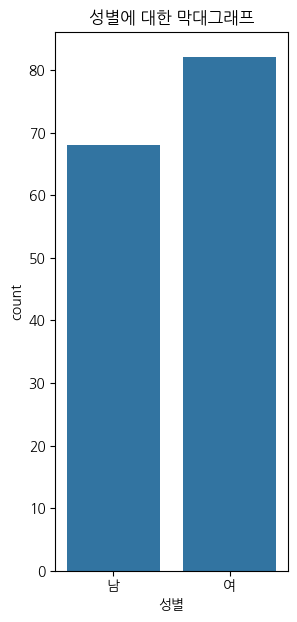

In [10]:
plt.figure(figsize=(3, 7))
sns.countplot(data=data, x="성별")
plt.title("성별에 대한 막대그래프")
plt.show()

Text(0.5, 1.0, '성별에 대한 막대그래프')

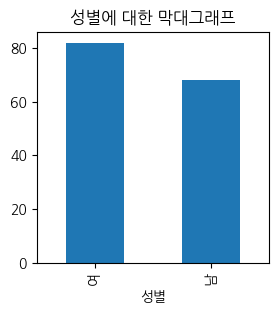

In [11]:
plt.figure(figsize=(3, 3))
gender_data = data["성별"].value_counts()
gender_data.plot(kind="bar")
plt.title("성별에 대한 막대그래프")

## 2) 순서형 데이터

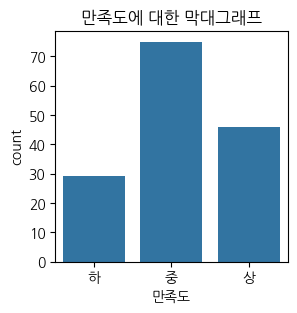

In [12]:
# 만족도에 대한 막대 그래프를 그려주세요
plt.figure(figsize=(3,3))
sns.countplot(data=data, x="만족도", order=["하", "중", "상"])
plt.title("만족도에 대한 막대그래프")
plt.show()

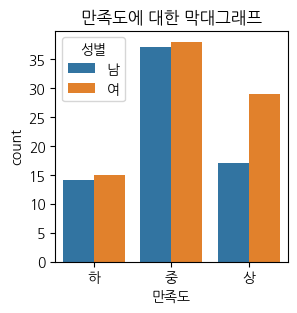

In [13]:
# 성별에 따른 만족도 막대그래프를 그려주세요
plt.figure(figsize=(3,3))
sns.countplot(data=data, x="만족도", order=["하", "중", "상"], hue="성별")
plt.title("만족도에 대한 막대그래프")
plt.show()

## 3) 연속형 데이터

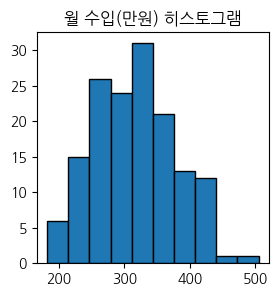

In [14]:
# "월 수입(만원)"열에 대한 히스토그램
plt.figure(figsize=(3, 3))
plt.hist(data["월 수입(만원)"], bins=10, edgecolor="black")
plt.title("월 수입(만원) 히스토그램")
plt.show()

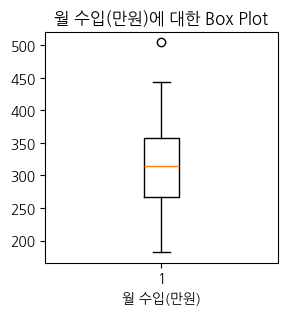

In [15]:
plt.figure(figsize=(3,3))
plt.boxplot(x=data["월 수입(만원)"])
plt.title("월 수입(만원)에 대한 Box Plot")
plt.xlabel("월 수입(만원)")
plt.show()

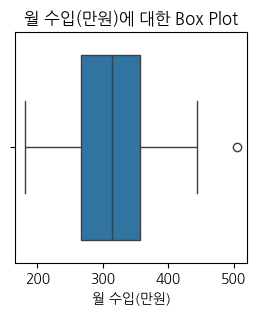

In [16]:
plt.figure(figsize=(3,3))
# sns.boxplot(data=data, y="월 수입(만원)")
sns.boxplot(data=data, x="월 수입(만원)")
plt.title("월 수입(만원)에 대한 Box Plot")
plt.show()

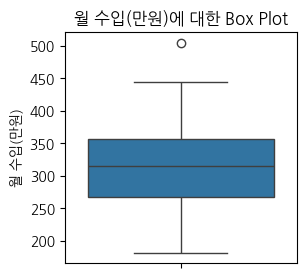

In [17]:
plt.figure(figsize=(3,3))
sns.boxplot(data=data, y="월 수입(만원)")
plt.title("월 수입(만원)에 대한 Box Plot")
plt.show()

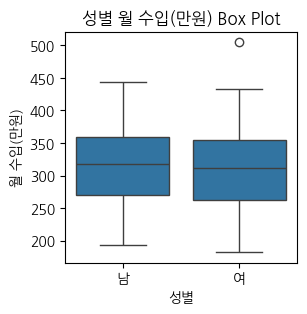

In [18]:
# 성별에 따른 월 수입 상자도표 그리기
plt.figure(figsize=(3,3))
sns.boxplot(data=data, x="성별", y="월 수입(만원)")
plt.title("성별 월 수입(만원) Box Plot")
plt.show()

## 4) 이산형 데이터

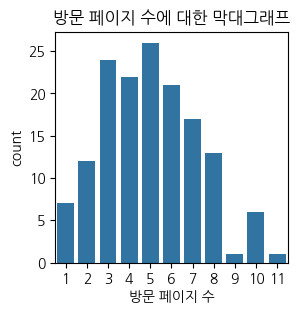

In [19]:
# 방문 페이지 수
## 구글링: ax를 이용한 시각화 도전
fig, ax = plt.subplots(figsize=(3,3))
sns.countplot(data=data, x="방문 페이지 수", ax=ax)
ax.set_title("방문 페이지 수에 대한 막대그래프")
plt.show()

## 5) 시계열 데이터

* 날짜에 대한 데이터 타입은 `datetime`이다.

### 날짜를 datatime으로 인식하는 방법 I

In [20]:
# sample_data.csv를 불러와주세요
data = pd.read_csv("data/sample_data.csv", parse_dates=["날짜"])
data

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수
0,2024-01-01,남,대전,상,40.4,193.0,3,0
1,2024-01-02,여,대전,중,34.8,288.0,2,2
2,2024-01-03,남,서울,하,57.2,274.0,8,0
3,2024-01-04,남,대전,중,45.1,329.0,7,1
4,2024-01-05,남,서울,상,23.8,341.0,4,0
...,...,...,...,...,...,...,...,...
145,2024-05-25,남,광주,중,41.5,323.0,5,0
146,2024-05-26,남,부산,상,57.5,336.0,4,1
147,2024-05-27,남,대전,중,33.5,266.0,6,1
148,2024-05-28,남,서울,중,33.3,358.0,8,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   날짜           150 non-null    datetime64[ns]
 1   성별           150 non-null    object        
 2   지역           150 non-null    object        
 3   만족도          150 non-null    object        
 4   평균 체류 시간(분)  150 non-null    float64       
 5   월 수입(만원)     150 non-null    float64       
 6   방문 페이지 수     150 non-null    int64         
 7   자녀 수         150 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 9.5+ KB


### 날짜 열을 datetime으로 바꾸는 방법 II

In [22]:
data = pd.read_csv("data/sample_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   날짜           150 non-null    object 
 1   성별           150 non-null    object 
 2   지역           150 non-null    object 
 3   만족도          150 non-null    object 
 4   평균 체류 시간(분)  150 non-null    float64
 5   월 수입(만원)     150 non-null    float64
 6   방문 페이지 수     150 non-null    int64  
 7   자녀 수         150 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 9.5+ KB


In [23]:
data["날짜"] = pd.to_datetime(data["날짜"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   날짜           150 non-null    datetime64[ns]
 1   성별           150 non-null    object        
 2   지역           150 non-null    object        
 3   만족도          150 non-null    object        
 4   평균 체류 시간(분)  150 non-null    float64       
 5   월 수입(만원)     150 non-null    float64       
 6   방문 페이지 수     150 non-null    int64         
 7   자녀 수         150 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 9.5+ KB


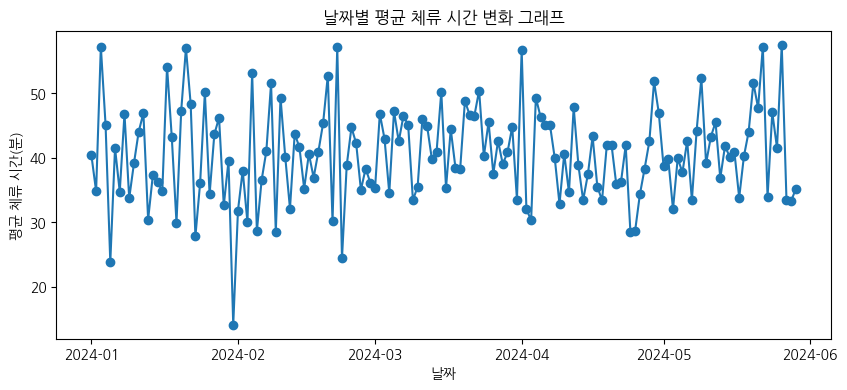

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data["날짜"], data["평균 체류 시간(분)"], marker="o")
ax.set_title("날짜별 평균 체류 시간 변화 그래프")
ax.set_xlabel("날짜")
ax.set_ylabel("평균 체류 시간(분)")
plt.show()

In [25]:
# 날짜, 평균 체류 시간(분) 열만 추출하세요
data[["날짜", "평균 체류 시간(분)"]]

,날짜,평균 체류 시간(분)
0,2024-01-01,40.4
1,2024-01-02,34.8
2,2024-01-03,57.2
3,2024-01-04,45.1
4,2024-01-05,23.8
...,...,...
145,2024-05-25,41.5
146,2024-05-26,57.5
147,2024-05-27,33.5
148,2024-05-28,33.3


# matplotlib와 seaborn의 차이

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 성별에 대한 막대그래프 만들기
# ["남", "여", "남", "남", ......]
# 막대그래프는 어떻게 그릴까? 남자는 몇 명이고 여자는 몇 명인지 카운트 해야 한다.
gender_data = data["성별"].value_counts()
gender_data

성별
여    82
남    68
Name: count, dtype: int64

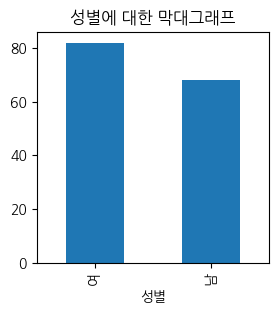

In [27]:
plt.figure(figsize=(3,3))
gender_data.plot(kind="bar")
plt.title("성별에 대한 막대그래프")
plt.show()

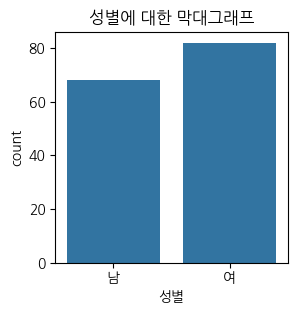

In [28]:
plt.figure(figsize=(3,3))
sns.countplot(data=data, x="성별")
plt.title("성별에 대한 막대그래프")
plt.show()

# subplots

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

(<Figure size 300x300 with 1 Axes>, <Axes: >)

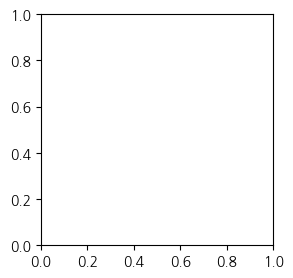

In [30]:
plt.subplots(figsize=(3,3))

(<Figure size 1000x300 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

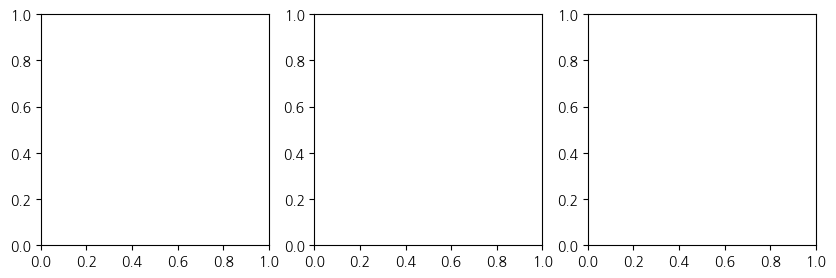

In [31]:
plt.subplots(1, 3, figsize=(10,3))

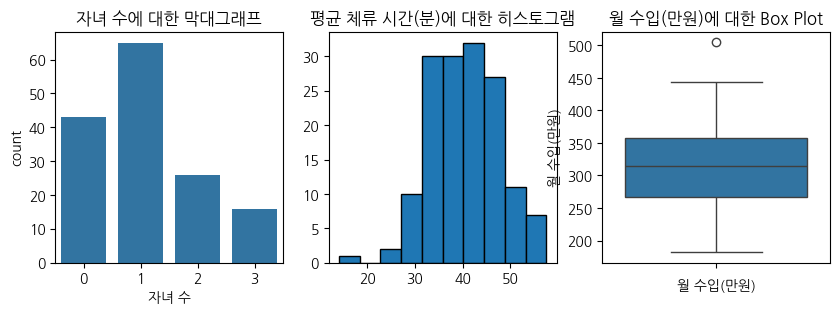

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(10,3))
# 첫번째 그래프: 자녀 수에 대한 막대 그래프
sns.countplot(data=data, x="자녀 수", ax=ax[0])
ax[0].set_title("자녀 수에 대한 막대그래프")
# 두번째 그래프: 평균 체류 시간(분)에 대한 히스토그램
ax[1].hist(data["평균 체류 시간(분)"], edgecolor="black")
ax[1].set_title("평균 체류 시간(분)에 대한 히스토그램")
# 세번째 그래프: 월 수입(만원)에 대한 상자그림
# ax[2].boxplot(x=data["월 수입(만원)"], vert=False)
sns.boxplot(y=data["월 수입(만원)"], ax=ax[2])
ax[2].set_title("월 수입(만원)에 대한 Box Plot")
ax[2].set_xlabel("월 수입(만원)")
plt.show()